# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
#from scipy.stats import linregress


#Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:

        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ola
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | san quintin
Processing Record 11 of Set 1 | ratnagiri
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | miyako
Processing Record 14 of Set 1 | saurimo
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | arlit
Processing Record 17 of Set 1 | umm lajj
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of S

Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | augustow
Processing Record 43 of Set 4 | ahipara
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | atar
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | roma
Processing Record 48 of Set 4 | florida
Processing Record 49 of Set 4 | lubao
Processing Record 0 of Set 5 | nouadhibou
Processing Record 1 of Set 5 | oussouye
Processing Record 2 of Set 5 | palmer
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | mao
Processing Record 5 of Set 5 | opuwo
Processing Record 6 of Set 5 | pundaguitan
Processing Record 7 of Set 5 | san jose
Processing Record 8 of Set 5 | kamina
Processing Record 9 of Set 5 | lolua
City not found. Skipping...
Processing Record 10 of Set 5 | port blair
Processing Record 11 of Set 5 | baiyin
Processing Record 12 of Set 5 | saint george
Processing Record 13 of Set 5 | henties bay


Processing Record 28 of Set 8 | makrikapa
City not found. Skipping...
Processing Record 29 of Set 8 | vertientes
Processing Record 30 of Set 8 | santa maria
Processing Record 31 of Set 8 | lajoskomarom
Processing Record 32 of Set 8 | tshane
Processing Record 33 of Set 8 | sault sainte marie
Processing Record 34 of Set 8 | bombay
Processing Record 35 of Set 8 | jubayl
City not found. Skipping...
Processing Record 36 of Set 8 | wagar
Processing Record 37 of Set 8 | miri
Processing Record 38 of Set 8 | albacete
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | gigmoto
Processing Record 41 of Set 8 | goundam
Processing Record 42 of Set 8 | brumado
Processing Record 43 of Set 8 | aripuana
Processing Record 44 of Set 8 | sola
Processing Record 45 of Set 8 | wanning
Processing Record 46 of Set 8 | ponta do sol
Processing Record 47 of Set 8 | najran
Processing Record 48 of Set 8 | hamilton
Processing Record 49 of Set 8 | nome
Processing Record 0 of Set 9 | prajeni
Process

Processing Record 15 of Set 12 | nishihara
Processing Record 16 of Set 12 | bambanglipuro
Processing Record 17 of Set 12 | nago
Processing Record 18 of Set 12 | katsuura
Processing Record 19 of Set 12 | trinidad
Processing Record 20 of Set 12 | cerfontaine
Processing Record 21 of Set 12 | padang
Processing Record 22 of Set 12 | pousat
City not found. Skipping...
Processing Record 23 of Set 12 | caravelas
Processing Record 24 of Set 12 | porto novo
Processing Record 25 of Set 12 | raudeberg
Processing Record 26 of Set 12 | bubaque
Processing Record 27 of Set 12 | oktyabrskiy
Processing Record 28 of Set 12 | tshikapa
Processing Record 29 of Set 12 | nivala
Processing Record 30 of Set 12 | lianran
Processing Record 31 of Set 12 | yamunanagar
Processing Record 32 of Set 12 | malmesbury
Processing Record 33 of Set 12 | la quinta
Processing Record 34 of Set 12 | rabo de peixe
Processing Record 35 of Set 12 | amazar
Processing Record 36 of Set 12 | varenikovskaya
Processing Record 37 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [109]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,37.06,75,0,4.61,AR,1624756183
1,ola,59.5833,151.2833,59.72,78,40,7.05,RU,1624755636
2,bluff,-46.6000,168.3333,51.80,87,89,13.80,NZ,1624756183
3,kapaa,22.0752,-159.3190,85.98,73,90,3.00,US,1624756183
4,mount gambier,-37.8333,140.7667,55.08,82,27,3.24,AU,1624756184


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [110]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.149229,18.553028,69.430431,71.518966,52.381034,7.052983,1.624756e+09
std,32.675607,90.116296,14.430178,21.188715,40.751041,5.221448,1.524051e+02
min,-54.800000,-179.166700,31.950000,7.000000,0.000000,0.000000,1.624756e+09
25%,-5.723975,-59.452200,58.957500,63.000000,7.000000,3.325000,1.624756e+09
50%,24.808300,20.132700,71.320000,76.000000,56.000000,5.670000,1.624756e+09
75%,46.878225,102.540475,80.480000,87.000000,98.000000,9.710000,1.624756e+09
max,78.218600,178.416700,115.840000,100.000000,100.000000,31.740000,1.624756e+09


In [111]:
#  Get the indices of cities that have humidity over 100%.
other_city_data = city_data_pd[city_data_pd['Humidity'] > 100].index
other_city_data

Int64Index([], dtype='int64')

In [112]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(other_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,37.06,75,0,4.61,AR,1624756183
1,ola,59.5833,151.2833,59.72,78,40,7.05,RU,1624755636
2,bluff,-46.6000,168.3333,51.80,87,89,13.80,NZ,1624756183
3,kapaa,22.0752,-159.3190,85.98,73,90,3.00,US,1624756183
4,mount gambier,-37.8333,140.7667,55.08,82,27,3.24,AU,1624756184


In [113]:
lats = clean_city_data['Lat']
max_temps = clean_city_data['Max Temp']
humidity = clean_city_data['Humidity']
cloudiness = clean_city_data['Cloudiness']
wind_speed = clean_city_data['Wind Speed']

clean_city_data.to_csv(output_data_file, index_label='City_ID')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

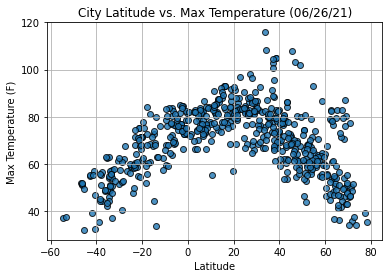

In [116]:
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

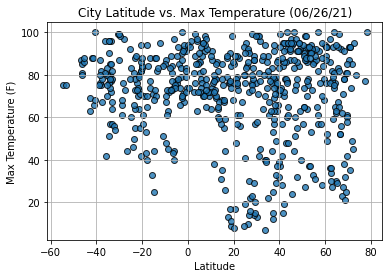

In [117]:
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

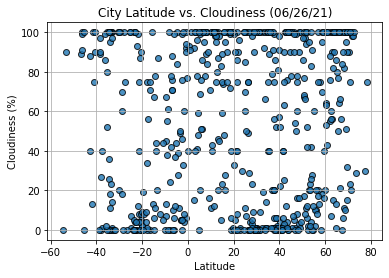

In [118]:
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

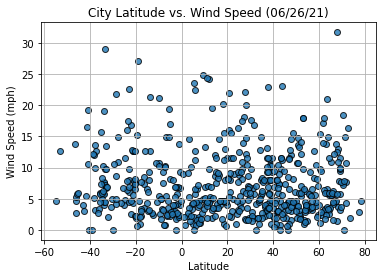

In [119]:
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Fig4.png')
plt.show()

## Linear Regression

In [120]:
northern_hem = city_data_pd.loc[city_data_pd['Lat'] >= 0]
southern_hem = city_data_pd.loc[city_data_pd['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

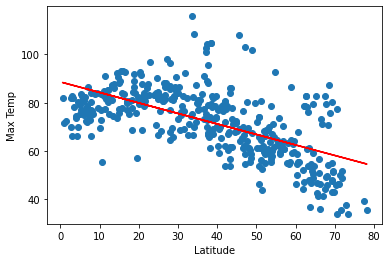

In [125]:

correlation = round(st.pearsonr(northern_hem['Lat'], northern_hem['Max Temp'])[0],2)

best_fit = st.linregress(northern_hem['Lat'], northern_hem['Max Temp'])

y_values = northern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(northern_hem['Lat'], northern_hem['Max Temp'])
plt.plot(northern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

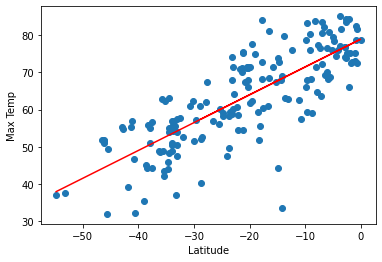

In [126]:
correlation = round(st.pearsonr(southern_hem['Lat'], southern_hem['Max Temp'])[0],2)

best_fit = st.linregress(southern_hem['Lat'], southern_hem['Max Temp'])

y_values = southern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(southern_hem['Lat'], southern_hem['Max Temp'])
plt.plot(southern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


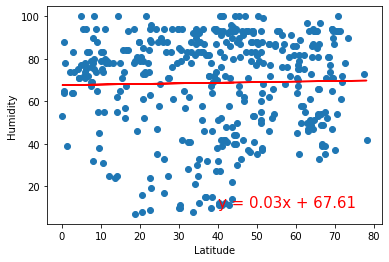

In [27]:

correlation = round(st.pearsonr(northern_hem['Lat'], northern_hem['Humidity'])[0],2)

best_fit = st.linregress(northern_hem['Lat'], northern_hem['Humidity'])

y_values = northern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(northern_hem['Lat'], northern_hem['Humidity'])
plt.plot(northern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

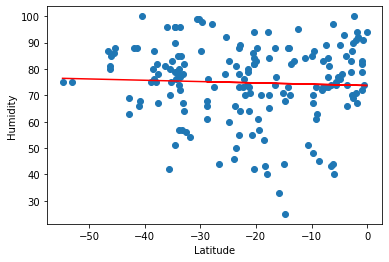

In [132]:
correlation = round(st.pearsonr(southern_hem['Lat'], southern_hem['Humidity'])[0],2)

best_fit = st.linregress(southern_hem['Lat'], southern_hem['Humidity'])

y_values = southern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(southern_hem['Lat'], southern_hem['Humidity'])
plt.plot(southern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

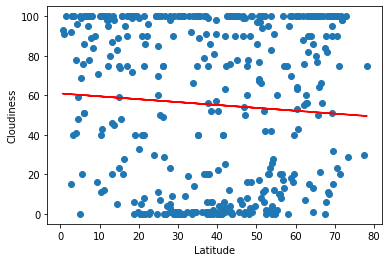

In [130]:

correlation = round(st.pearsonr(northern_hem['Lat'], northern_hem['Cloudiness'])[0],2)

best_fit = st.linregress(northern_hem['Lat'], northern_hem['Cloudiness'])

y_values = northern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(northern_hem['Lat'], northern_hem['Cloudiness'])
plt.plot(northern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

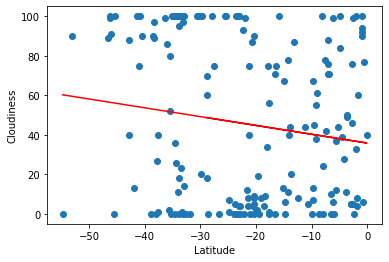

In [133]:
correlation = round(st.pearsonr(southern_hem['Lat'], southern_hem['Cloudiness'])[0],2)

best_fit = st.linregress(southern_hem['Lat'], southern_hem['Cloudiness'])

y_values = southern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(southern_hem['Lat'], southern_hem['Cloudiness'])
plt.plot(southern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

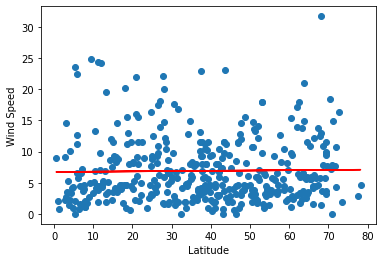

In [128]:
correlation = round(st.pearsonr(northern_hem['Lat'], northern_hem['Wind Speed'])[0],2)

best_fit = st.linregress(northern_hem['Lat'], northern_hem['Wind Speed'])

y_values = northern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(northern_hem['Lat'], northern_hem['Wind Speed'])
plt.plot(northern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

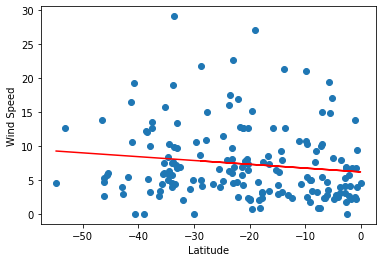

In [134]:
correlation = round(st.pearsonr(southern_hem['Lat'], southern_hem['Wind Speed'])[0],2)

best_fit = st.linregress(southern_hem['Lat'], southern_hem['Wind Speed'])

y_values = southern_hem['Lat'] * best_fit[0] + best_fit[1]
plt.scatter(southern_hem['Lat'], southern_hem['Wind Speed'])
plt.plot(southern_hem['Lat'], y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()